In [ ]:
import numpy as np
import os

from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping


from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train= '/content/drive/MyDrive/nhandienkhuongmat/x_train'
x_test= '/content/drive/MyDrive/nhandienkhuongmat/x_test'


In [ ]:

x_train = ImageDataGenerator(rescale=1/255)
x_test = ImageDataGenerator(rescale=1/255)



In [ ]:
x_train_data = x_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/nhandienkhuongmat/x_train",
    target_size=(224, 224),
    batch_size=3,
    class_mode='categorical',
    )
x_test_data = x_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/nhandienkhuongmat/x_test",
    target_size=(224, 224),
    batch_size=3,
    class_mode= "categorical",
    )

Found 27 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


In [ ]:
x_train_data.class_indices

{'son': 0, 'thai': 1, 'trang': 2}

In [ ]:
  model = Sequential()

  model.add(Conv2D(32,(3,3),input_shape=(224,224,3),padding='same',activation='relu'))
  model.add(Dropout(0.2))

  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.2))

  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(218,activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(3,activation='softmax'))
  model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 dropout_31 (Dropout)        (None, 224, 224, 32)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 dropout_32 (Dropout)        (None, 112, 112, 64)      0         
                                                      

In [ ]:
from tensorflow.keras.optimizers import SGD
#opt = SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_data,
                  epochs=5,
                  batch_size=10,
                  verbose=1,
                  validation_data= x_test_data)

Epoch 1/5
9/9 [==============================] - 3s 276ms/step - loss: 0.5234 - accuracy: 0.8519 - val_loss: 1.4394 - val_accuracy: 0.6364
Epoch 2/5
9/9 [==============================] - 2s 237ms/step - loss: 0.2695 - accuracy: 0.9259 - val_loss: 0.7234 - val_accuracy: 0.6364
Epoch 3/5
9/9 [==============================] - 2s 249ms/step - loss: 0.1423 - accuracy: 1.0000 - val_loss: 0.8392 - val_accuracy: 0.6364
Epoch 4/5
9/9 [==============================] - 2s 238ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 1.1380 - val_accuracy: 0.6364
Epoch 5/5
9/9 [==============================] - 2s 239ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.2052 - val_accuracy: 0.7273


In [ ]:
model.save('nhandangmat.h5')

In [ ]:
from keras.models import load_model
nhandangmat = load_model('nhandangmat.h5')

(1, 224, 224, 3)

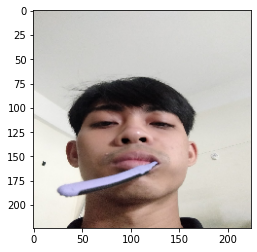

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/nhandienkhuongmat/x_test/son/z3432747691879_d290fbd1cacf32321019343ab2ad1f5f.jpg', target_size =(224,224))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
img = img.astype('float32')
img = img/255
img.shape

In [ ]:
np.argmax(nhandangmat.predict(img),axis= 1)

array([0])

{'son': 0, 'trang': 2,'thai':1}
